In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("./data/ToddlerAutismDataset.csv")
df.head

<bound method NDFrame.head of       Case_No  A1  A2  A3  A4  A5  A6  A7  A8  A9  A10  Age_Mons  \
0           1   0   0   0   0   0   0   1   1   0    1        28   
1           2   1   1   0   0   0   1   1   0   0    0        36   
2           3   1   0   0   0   0   0   1   1   0    1        36   
3           4   1   1   1   1   1   1   1   1   1    1        24   
4           5   1   1   0   1   1   1   1   1   1    1        20   
...       ...  ..  ..  ..  ..  ..  ..  ..  ..  ..  ...       ...   
1049     1050   0   0   0   0   0   0   0   0   0    1        24   
1050     1051   0   0   1   1   1   0   1   0   1    0        12   
1051     1052   1   0   1   1   1   1   1   1   1    1        18   
1052     1053   1   0   0   0   0   0   0   1   0    1        19   
1053     1054   1   1   0   0   1   1   0   1   1    0        24   

      Qchat-10-Score Sex       Ethnicity Jaundice Family_mem_with_ASD  \
0                  3   f  middle eastern      yes                  no   
1      

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Case_No                 1054 non-null   int64 
 1   A1                      1054 non-null   int64 
 2   A2                      1054 non-null   int64 
 3   A3                      1054 non-null   int64 
 4   A4                      1054 non-null   int64 
 5   A5                      1054 non-null   int64 
 6   A6                      1054 non-null   int64 
 7   A7                      1054 non-null   int64 
 8   A8                      1054 non-null   int64 
 9   A9                      1054 non-null   int64 
 10  A10                     1054 non-null   int64 
 11  Age_Mons                1054 non-null   int64 
 12  Qchat-10-Score          1054 non-null   int64 
 13  Sex                     1054 non-null   object
 14  Ethnicity               1054 non-null   object
 15  Jaun

In [4]:
df = df.drop("Qchat-10-Score", axis=1)

y = df['Class/ASD Traits']
X = df.drop("Class/ASD Traits", axis=1)

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Convert the last 5 columns of X to numeric data types
categorical_columns = ['Sex', 'Ethnicity', 'Jaundice', 'Family_mem_with_ASD', 'Who completed the test']
for i in categorical_columns:
    X[i] = label_encoder.fit_transform(X[i])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)

In [5]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737 entries, 988 to 1014
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Case_No                 737 non-null    int64
 1   A1                      737 non-null    int64
 2   A2                      737 non-null    int64
 3   A3                      737 non-null    int64
 4   A4                      737 non-null    int64
 5   A5                      737 non-null    int64
 6   A6                      737 non-null    int64
 7   A7                      737 non-null    int64
 8   A8                      737 non-null    int64
 9   A9                      737 non-null    int64
 10  A10                     737 non-null    int64
 11  Age_Mons                737 non-null    int64
 12  Sex                     737 non-null    int32
 13  Ethnicity               737 non-null    int32
 14  Jaundice                737 non-null    int32
 15  Family_mem_with_ASD     7

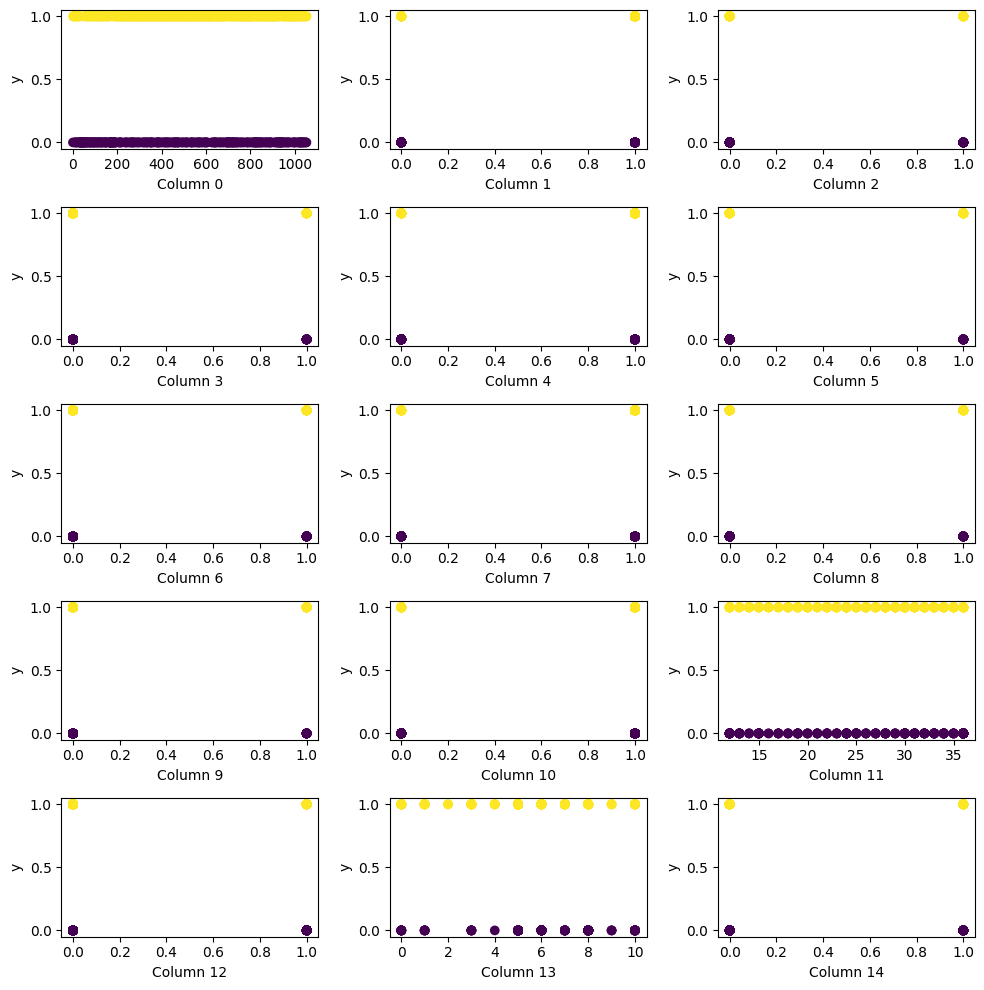

In [6]:

fig, axs = plt.subplots(5, 3, figsize=(10, 10))

for i in range(5):
    for j in range(3):
        col_index = i * 3 + j
        axs[i, j].scatter(X.iloc[:, col_index], y, c=y)
        axs[i, j].set_xlabel('Column {}'.format(col_index))
        axs[i, j].set_ylabel('y')

plt.tight_layout()
plt.show()

In [7]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_model = SVC(kernel='rbf', random_state=42)
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}
grid_search = GridSearchCV(svm_model, param_grid, refit=True, verbose=2, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END .....................................C=0.1, gamma=1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ...................................C=0.1, gamma=0.1; total time=   0.0s
[CV] END ..................................C=0.1, gamma=0.01; total time=   0.0s
[CV] END ..................................C=0.1

In [8]:
best_svm_model = grid_search.best_estimator_
best_svm_model.fit(X_train, y_train)

print(best_svm_model)

y_pred = best_svm_model.predict(X_test) 

SVC(C=100, gamma=0.001, random_state=42)


In [9]:
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 78  20]
 [ 16 203]]
              precision    recall  f1-score   support

           0       0.83      0.80      0.81        98
           1       0.91      0.93      0.92       219

    accuracy                           0.89       317
   macro avg       0.87      0.86      0.87       317
weighted avg       0.89      0.89      0.89       317



In [10]:
from tpot import TPOTClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

# Initialize TPOT
tpot = TPOTClassifier(generations=1, population_size=20, verbosity=2, config_dict='TPOT sparse', cv=10, scoring='f1')

# Fit TPOT on the training data
tpot.fit(X_train, y_train)

# Evaluate the performance on the validation set
print(tpot.score(X_test, y_test))

# Make predictions on the test set using the best pipeline
y_pred = tpot.fitted_pipeline_.predict(X_test)

# Evaluate the predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

c:\Users\anaso\AppData\Local\Programs\Python\Python311\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


                                                                            
Generation 1 - Current best internal CV score: 0.9843293686746876
                                                                            
Best pipeline: XGBClassifier(input_matrix, learning_rate=0.1, max_depth=10, min_child_weight=1, n_estimators=100, n_jobs=1, subsample=0.4, verbosity=0)
0.9864253393665159
Accuracy: 0.9810725552050473
[[ 93   5]
 [  1 218]]
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        98
           1       0.98      1.00      0.99       219

    accuracy                           0.98       317
   macro avg       0.98      0.97      0.98       317
weighted avg       0.98      0.98      0.98       317



In [12]:
def predition(data): # data is a np array with the necesarry features
    pred = tpot.fitted_pipeline_.predict(data)
    return pred